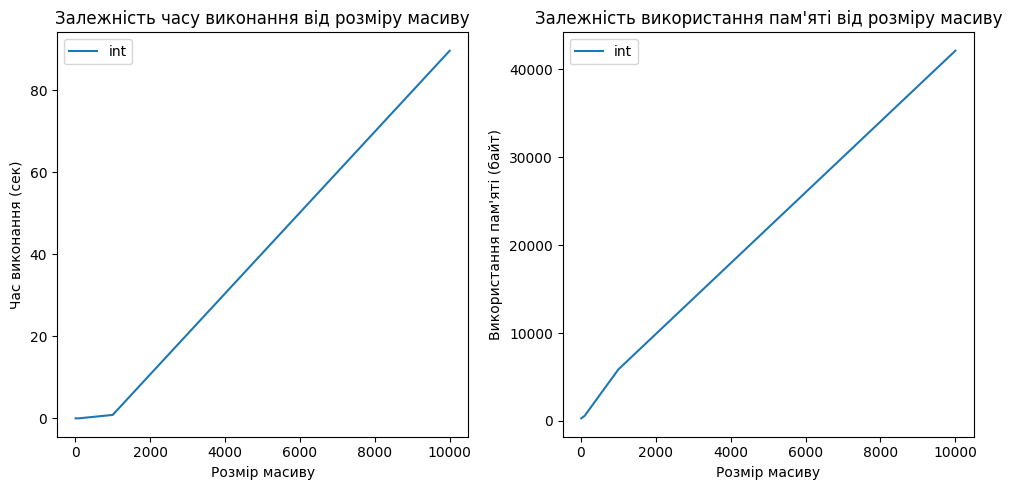

In [5]:
import numpy as np
import time
import tracemalloc
import matplotlib.pyplot as plt

# Оголошення розмірів масивів
sizes = [10, 100, 1000, 10000]

# Функція для вимірювання часу виконання та використання пам'яті
def measure_time_and_memory(func, arr):
    tracemalloc.start()
    start_time = time.time()
    arr = np.array(arr)  # Перетворення списку на масив NumPy
    func(arr)
    end_time = time.time()
    peak_memory = tracemalloc.get_traced_memory()[1]
    tracemalloc.stop()
    return end_time - start_time, peak_memory

def insertion_sort(arr):
    n = len(arr)
    for i in range(1, n):
        key = arr[i]
        j = i - 1
        # Замість звернення до arr[j] кожного разу, зберігаємо його значення
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

# Потім використовуйте цей оптимізований код у вашому вимірюванні часу та пам'яті


# Оголошення списків для зберігання результатів
time_results_int = []
memory_results_int = []

# Вимірювання часу виконання та використання пам'яті для кожного розміру масиву та типу даних
for size in sizes:
    arr_int = np.random.randint(0, 100, size=size)
    time_int, memory_int = measure_time_and_memory(insertion_sort, arr_int)
    time_results_int.append(time_int)
    memory_results_int.append(memory_int)

# Відображення графіків
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(sizes, time_results_int, label='int')
plt.xlabel('Розмір масиву')
plt.ylabel('Час виконання (сек)')
plt.title('Залежність часу виконання від розміру масиву')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sizes, memory_results_int, label='int')
plt.xlabel('Розмір масиву')
plt.ylabel("Використання пам'яті (байт)")
plt.title("Залежність використання пам'яті від розміру масиву")
plt.legend()

plt.tight_layout()
plt.show()
